In [6]:
import re
import glob
import numpy as np

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])
        else:
            continue
    
def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies

mgs = energyList('./mg/*.out')
cas = energyList('./ca/*.out')
srs = energyList('./sr/*.out')
bas = energyList('./ba/*.out')

mg = []
ca = []
sr = []
ba = []

metals = [mg, ca, sr, ba]
metalss = [mgs, cas, srs, bas]
ions = ['mg', 'ca', 'sr', 'ba']

for m, ms, z in zip(metals, metalss, ions):
    for i in range(10, 21):
            try:
                m.append(ms[f'./{z}/{i}.out'])
            except:
                raise

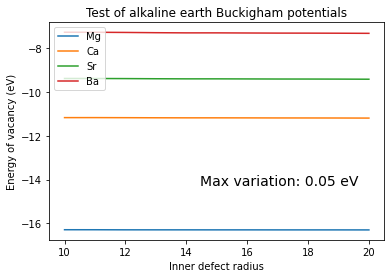

In [19]:
import matplotlib.pyplot as plt

x = list(range(10,21))

fig, ax = plt.subplots()

ax.plot(x, mg)
ax.plot(x, ca)
ax.plot(x, sr)
ax.plot(x, ba)

textstr = 'Max variation: 0.05 eV'

ax.text(0.45, 0.3, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top')

plt.xlabel('Inner defect radius')
plt.ylabel('Energy of impurity (eV)')
plt.legend(labels=['Mg', 'Ca', 'Sr', 'Ba'],  loc = 'upper left')
plt.title('Test of alkaline earth Buckigham potentials')
plt.savefig('/home/ben/Documents/gulp_calcs/0_summary/buckingham_test.jpg', bbox_inches='tight', dpi=500)